# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

units = "metric"

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
data = pd.read_csv(output_data_file)
data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []

cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [5]:
cities

['luderitz',
 'college',
 'hermanus',
 'pecos',
 'odweyne',
 'dingle',
 'buta',
 'vaini',
 'ushuaia',
 'lebu',
 'bethel',
 'saint-joseph',
 'san policarpo',
 'sentyabrskiy',
 'talaya',
 'aripuana',
 'tura',
 'arraial do cabo',
 'barrow',
 'carnarvon',
 'mys shmidta',
 'ajdabiya',
 'clarence town',
 'kloulklubed',
 'belyy gorodok',
 'turbat',
 'rikitea',
 'ulcinj',
 'albany',
 'ponta do sol',
 'charleville-mezieres',
 'vao',
 'punta arenas',
 'kavieng',
 'tsihombe',
 'rozkishne',
 'iaciara',
 'parabel',
 'matagami',
 'cape town',
 'yuanping',
 'edd',
 'moron',
 'airai',
 'gushikawa',
 'klaksvik',
 'athens',
 'belushya guba',
 'solovetskiy',
 'faanui',
 'balakhninskiy',
 'phalaborwa',
 'severo-kurilsk',
 'amderma',
 'bluff',
 'jamestown',
 'kapaa',
 'flinders',
 'sobolevo',
 'atuona',
 'samarai',
 'bababe',
 'vaitupu',
 'taolanaro',
 'butaritari',
 'san miguel',
 'chkalovskoye',
 'busselton',
 'araouane',
 'husavik',
 'marawi',
 'bengkulu',
 'acarau',
 'lata',
 'sabha',
 'kiruna',
 'alic

In [5]:
# check if the url is sufficient: 
url = "http://api.openweathermap.org/data/2.5/weather"
city_url = url + "?q=" + "Irvine" + "&appid=" + weather_api_key + "&units=" + units
cities_collection = requests.get(city_url).json()
pprint(cities_collection)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.6695, 'lon': -117.8231},
 'dt': 1644434391,
 'id': 5359777,
 'main': {'feels_like': 26.71,
          'humidity': 11,
          'pressure': 1018,
          'temp': 28.14,
          'temp_max': 30.99,
          'temp_min': 24.3},
 'name': 'Irvine',
 'sys': {'country': 'US',
         'id': 5876,
         'sunrise': 1644417678,
         'sunset': 1644456590,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50, 'speed': 4.63}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
# API set up
cities_info = []
#base_url = "https://openweathermap.org/api/&key=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather"
#query = cities

# to help python count every row in the cities (one by one)
records = 1 
sets = 1 

# enumerate is for loop function  when we need to look for many interables here (lats|lngs|temp|humid...)
# set is to plit down the 620 cities into smaller group of 10 or 20
# we use two interables i, city , so we need to do enumerate function
for i, city in enumerate(cities):
    # if here: we want to split out the looking interables into every 20 rows per count-round and i>=20 that mean 
    # the next 20 rows we put to next looking after 15 seconds break
    if (i % 20 == 0 and i >= 20):
        sets += 1
        records = 0
        print("End of set. Sleeping for 15 seconds.")
        time.sleep(15)
    # create url for each city 
    city_url = url + "?q=" + city + "&appid=" + weather_api_key + "&units=" + units
    #print(city_url)
    records += 1
    try:
        cities_collection = requests.get(city_url).json()
        lats = cities_collection["coord"]["lat"]
        longs = cities_collection["coord"]["lon"]
        temperature = cities_collection["main"]["temp"]
        temp_max = cities_collection["main"]["temp_max"]
        humidity = cities_collection["main"]["humidity"]
        cloudiness = cities_collection["clouds"]["all"]
        wind_speed = cities_collection["wind"]["speed"]
        date = cities_collection["dt"]
        country = cities_collection['sys']['country']
        
        cities_info.append({"city": city,
                           "latitutes": lats,
                            "longtitudes": longs,
                            "temperature (F)": temperature,
                            "Temp_max (F)":temp_max,
                            "humidity": humidity,
                            "cloudiness": cloudiness,
                            "wind speed": wind_speed,
                            "date": date,
                            "country": country
                           })
        
    except:
        print('city error: not found, skipping')
        pass
print('----information all collected-----')
#print(cities_collection)

city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
city error: not found, skipping
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
city error: not found, skipping
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
city error: not found, skipping
city error: not found, skipping
End of set. Sleeping for 15 seconds.
city error: not found, skipping
End of set. Sleeping for 15 seconds.
End of set. Sleeping for 15 seconds.
city error: not f

In [7]:
# check how many cities were found and print out the cities data
len(cities_info)
pprint(cities_info)

[{'Temp_max (F)': -9.9,
  'city': 'ust-tsilma',
  'cloudiness': 100,
  'country': 'RU',
  'date': 1644434596,
  'humidity': 87,
  'latitutes': 65.441,
  'longtitudes': 52.1498,
  'temperature (F)': -9.9,
  'wind speed': 5.76},
 {'Temp_max (F)': -23.71,
  'city': 'yellowknife',
  'cloudiness': 100,
  'country': 'CA',
  'date': 1644434475,
  'humidity': 70,
  'latitutes': 62.456,
  'longtitudes': -114.3525,
  'temperature (F)': -23.71,
  'wind speed': 4.12},
 {'Temp_max (F)': 16.22,
  'city': 'ribeira grande',
  'cloudiness': 20,
  'country': 'PT',
  'date': 1644434597,
  'humidity': 67,
  'latitutes': 38.5167,
  'longtitudes': -28.7,
  'temperature (F)': 16.22,
  'wind speed': 5.14},
 {'Temp_max (F)': -24.57,
  'city': 'tiksi',
  'cloudiness': 100,
  'country': 'RU',
  'date': 1644434597,
  'humidity': 93,
  'latitutes': 71.6872,
  'longtitudes': 128.8694,
  'temperature (F)': -24.57,
  'wind speed': 5.79},
 {'Temp_max (F)': 27.19,
  'city': 'kavieng',
  'cloudiness': 88,
  'country': '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# convert the cities_info into a dataframe
weather_data = pd.DataFrame(cities_info)
weather_data.head(20)

NameError: name 'cities_info' is not defined

In [10]:
#pprint(cities_collection)

In [3]:
# export city data into csv file: 
weather_data.to_csv("../Output_data/weather_data.csv", index=False, header=True)

NameError: name 'weather_data' is not defined

In [5]:
# open csv file to avoid taking long time running above codes
weather_data_path = "../output_data/weather_data.csv"
weather_df = pd.read_csv(weather_data_path)
weather_df.head()

,city,latitutes,longtitudes,temperature (F),Temp_max (F),humidity,cloudiness,wind speed,date,country
0,ust-tsilma,65.4410,52.1498,-9.90,-9.90,87,100,5.76,1644434596,RU
1,yellowknife,62.4560,-114.3525,-23.71,-23.71,70,100,4.12,1644434475,CA
2,ribeira grande,38.5167,-28.7000,16.22,16.22,67,20,5.14,1644434597,PT
3,tiksi,71.6872,128.8694,-24.57,-24.57,93,100,5.79,1644434597,RU
4,kavieng,-2.5744,150.7967,27.19,27.19,80,88,3.01,1644434598,PG


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# check if there is any cities with humidity > 100 
humid_100 = weather_df.loc[weather_df["humidity"]>100]
len(humid_100)

# the len function show that: 0 city has humidity >100, so, we skip to next step

0

In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [15]:
# please refer to the separate pdf file for my analysis on all those factors

## Latitude vs. Temperature Plot

 the correlation bt Latitudes and Temperature is : (-0.7592161239122206, 1.2018267802612015e-110)


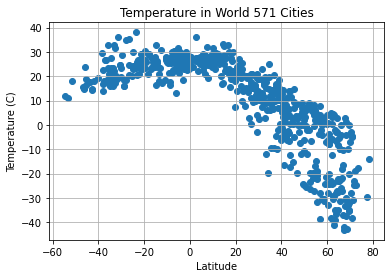

In [48]:
plt.scatter(weather_df["latitutes"], weather_df["temperature (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World 571 Cities")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/TemperatureInWorld_571_Cities.png")

correlation = st.pearsonr(weather_df["latitutes"],weather_df["temperature (F)"])
print(f" the correlation bt Latitudes and Temperature is : {correlation}")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

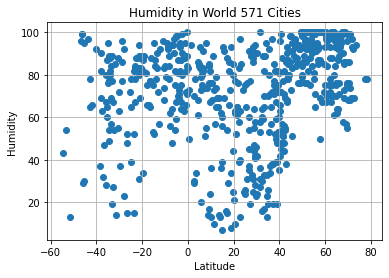

 the correlation bt Latitudes and Humidity is : (0.19503626750417602, 2.0458201123571253e-06)


In [20]:
plt.scatter(weather_df["latitutes"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World 571 Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorld_571_Cities.png")

# Show plot
plt.show()
correlation = st.pearsonr(weather_df["latitutes"],weather_df["humidity"])
print(f" the correlation bt Latitudes and Humidity is : {correlation}")

## Latitude vs. Cloudiness Plot

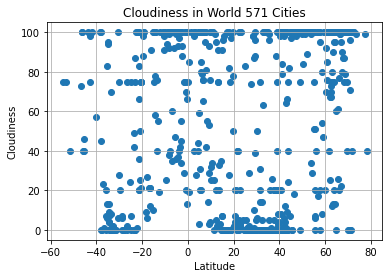

 the correlation bt Latitudes and Cloudiness is : (0.17648395504154657, 1.7907254326066666e-05)


In [21]:
plt.scatter(weather_df["latitutes"], weather_df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World 571 Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorld_571_Cities.png")

# Show plot
plt.show()
correlation = st.pearsonr(weather_df["latitutes"],weather_df["cloudiness"])
print(f" the correlation bt Latitudes and Cloudiness is : {correlation}")

## Latitude vs. Wind Speed Plot

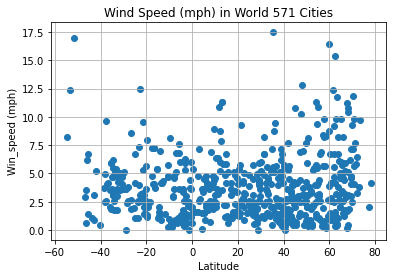

 the correlation bt Latitudes and Wind speed is : (0.052552138635448734, 0.20474965617253746)


In [22]:
plt.scatter(weather_df["latitutes"], weather_df["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) in World 571 Cities")
plt.ylabel("Win_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Win_speed_InWorld_571_Cities.png")

# Show plot
plt.show()
correlation = st.pearsonr(weather_df["latitutes"],weather_df["wind speed"])
print(f" the correlation bt Latitudes and Wind speed is : {correlation}")

## Linear Regression

In [7]:
# Northern Hemisphere | Southern Hemisphere | Max temp | Latitudes | Humid | Cloudiness | wind_speed 
North = weather_df.loc[weather_df["latitutes"]>=0]
North.head()
North.to_csv("../Output_data/North_data.csv", index=False, header=True)

In [8]:
South = weather_df.loc[weather_df["latitutes"]<=0]
South.head()
South.to_csv("../Output_data/South_data.csv", index=False, header=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

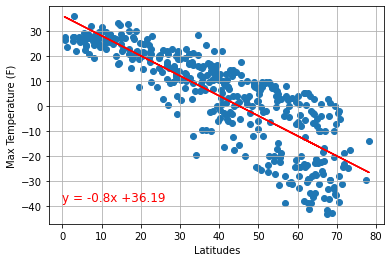

In [30]:
lats = North.iloc[:,1]
temp_max = North.iloc[:,4]
plt.scatter(lats,temp_max)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, temp_max)
regress_values = lats * slope + intercept
plt.plot(lats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,-38),fontsize=12,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

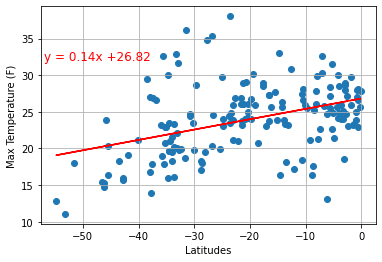

In [11]:
slats = South.iloc[:,1]
stemp_max = South.iloc[:,4]
plt.scatter(slats,stemp_max)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(slats, stemp_max)
regress_values = slats * slope + intercept
plt.plot(slats,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-57,32),fontsize=12,color="red")
plt.show()


In [13]:
correlationS = st.pearsonr(South["latitutes"],stemp_max)
print(correlationS)

(0.40670259510779083, 4.0894860049101896e-08)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

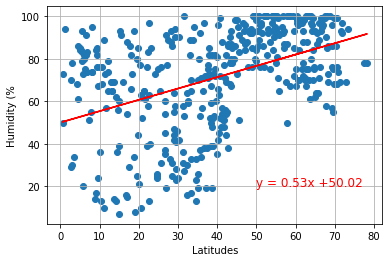

In [35]:
lats = North.iloc[:,1]
humid = North.iloc[:,5]
plt.scatter(lats,humid)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Humidity (%')

(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, humid)
regress_values = lats * slope + intercept
plt.plot(lats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

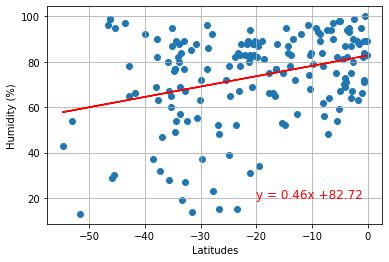

In [36]:
slats = South.iloc[:,1]
shumid = South.iloc[:,5]
plt.scatter(slats,shumid)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(slats, shumid)
regress_values = slats * slope + intercept
plt.plot(slats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

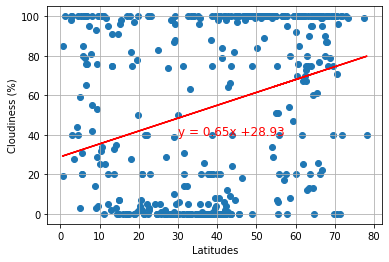

In [37]:
lats = North.iloc[:,1]
cloud = North.iloc[:,6]
plt.scatter(lats,cloud)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, cloud)
regress_values = lats * slope + intercept
plt.plot(lats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(30,40),fontsize=12,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

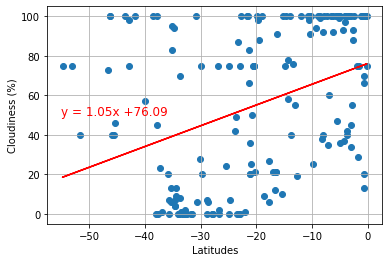

In [38]:
slats = South.iloc[:,1]
scloud = South.iloc[:,6]
plt.scatter(slats,scloud)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(slats, scloud)
regress_values = slats * slope + intercept
plt.plot(slats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

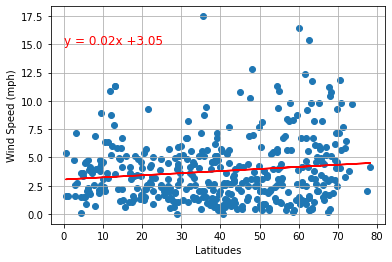

In [39]:
lats = North.iloc[:,1]
wind = North.iloc[:,7]
plt.scatter(lats,wind)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, wind)
regress_values = lats * slope + intercept
plt.plot(lats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,15),fontsize=12,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

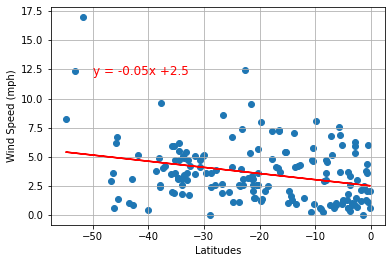

In [40]:
slats = South.iloc[:,1]
swind = South.iloc[:,7]
plt.scatter(slats,swind)
plt.grid()
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(slats, swind)
regress_values = slats * slope + intercept
plt.plot(slats,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,12),fontsize=12,color="red")
plt.show()

In [ ]:
# Analysis in pdf presentation file. <weather_vacation_analysis.pdf>